In [1]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

# Set the data path for dataset and model location
dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/"
model_loc = "/content/gdrive/My Drive/Colab Notebooks/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Untitled0.ipynb', 'Untitled', 'Untitled1.ipynb', 'Untitled3.ipynb', 'T2 Analyzing GC content of the sequence.ipynb', 'T1 Perform sequence alignment on DNA sequence.ipynb', 'Untitled2.ipynb', 'Untitled4.ipynb', '[1_April_2024]_Heart_Disease_NN.ipynb', 'heart.csv']


In [3]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets

data.head() # show the first 5 rows

# 1. Obtain the dataset.
# 2. Load the dataset.
# 3. Understand the data structure.
# 4. Compute summary statistics.
# 5. Perform univariate analysis.
# 6. Conduct bivariate analysis.
# 7. Explore multivariate relationships.
# 8. Engineer features if necessary.
# 9. Visualize data for insights.
# 10. Iterate and refine analysis.
# 11. Document findings.
# 12. Validate assumptions.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

# This code converts specific variables in the dataset to categorical type, making it easier
# to analyze and interpret them as categories rather than numerical values.

In [5]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

data.head()

<ipython-input-5-3ad990b4f431>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-3ad990b4f431>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-3ad990b4f431>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-3ad990b4f431>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-5-3ad990b4f431>:3: FutureWarning: In a future version, the In

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,2,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,2,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [6]:
### 6. Explain line 3, 4 and 5 and print the shape of x and y

y = data['target'].values  ## here we take the values from the target
y = y.reshape(y.shape[0],1) ## then we can change y shape into the 1 dimension
x = data.drop(['target'],axis=1) ## then we can drop the the target data in x
##
print(x.shape)
print(y.shape)


(303, 21)
(303, 1)


In [7]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

### Example dataset
data = pd.DataFrame ({'A' : [1, 2, 3], 'B' : [10, 20, 30], 'C' : [100, 200, 300]})
print('Exp Data : ')
print(data)
### Example of the dataset

### Normalization code on simple dataset
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print("Normalize Exp Data : ")
print(data_norm)

Exp Data : 
   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
Normalize Exp Data : 
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

# The min-max normalization applied to the heart dataset scales each feature's values between 0 and 1.
# This process preserves relationships between values, ensures equal contribution from each feature,
# and simplifies comparison and interpretation.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print (y.size)

(181, 21)
(61, 21)
(61, 21)
303


In [10]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

# Input Layer (64 neurons, softmax activation): Receives input data and converts it into probabilities,
# ensuring that all outputs sum up to 1, suitable for multi-class classification.

# Hidden Layer (32 neurons, softmax activation): Processes features extracted from the input layer,
# transforming them into probabilities for further abstraction and pattern recognition.

# Output Layer (1 neuron, sigmoid activation): Produces a probability value between 0 and 1, representing
# the likelihood of the input belonging to the positive class in binary classification tasks.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# Loss function ('mse' - Mean Squared Error):

# - Measures the difference between predicted and actual values.
# - MSE is commonly used for regression tasks, aiming to minimize the average squared difference.

# Optimizer (Adam with lr=0.01):

# - Updates model weights to minimize the loss.
# - Adam is an adaptive optimization algorithm.
# - Learning rate controls step size for weight updates.

# Metrics (['acc'] - Accuracy):

# - Assesses model performance during training.
# - Accuracy measures the proportion of correctly classified samples.
# - Useful for classification tasks to gauge overall model performance.

In [12]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
12/12 [==============================] - 1s 24ms/step - loss: 0.2490 - acc: 0.5580 - val_loss: 0.2489 - val_acc: 0.5246
Epoch 2/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2468 - acc: 0.5580 - val_loss: 0.2476 - val_acc: 0.5246
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2446 - acc: 0.5580 - val_loss: 0.2451 - val_acc: 0.5246
Epoch 4/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2399 - acc: 0.5580 - val_loss: 0.2384 - val_acc: 0.5246
Epoch 5/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.2326 - acc: 0.5580 - val_loss: 0.2289 - val_acc: 0.5246
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2221 - acc: 0.7072 - val_loss: 0.2159 - val_acc: 0.7213
Epoch 7/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2078 - acc: 0.8343 - val_loss: 0.2023 - val_acc: 0.8033
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 0

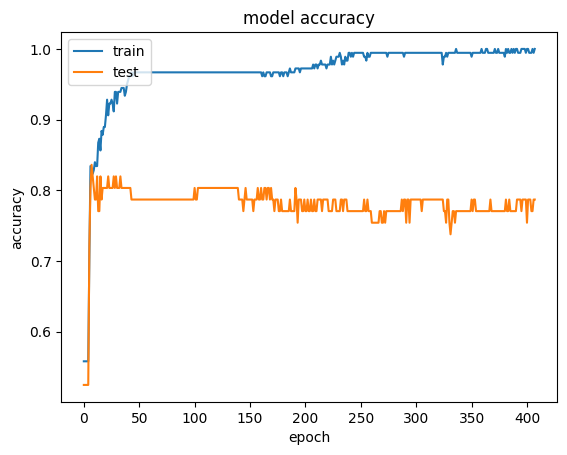

In [15]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()


# The plot generated by this code represents the model's accuracy over epochs during training and validation.

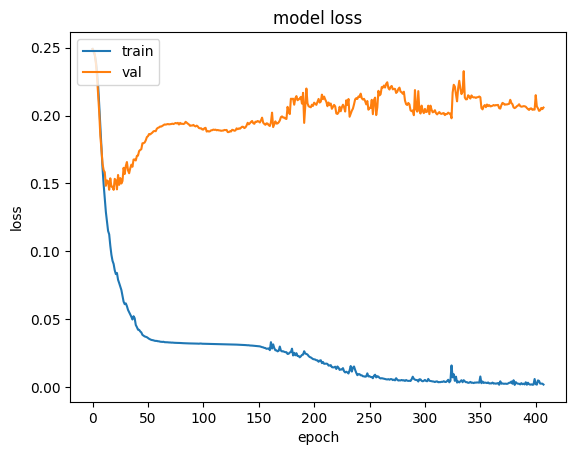

In [16]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [18]:
### 14. What is the purpose of evaluating the model on the test dataset?

## To ensure that we can get test and get the best results on our model. The better the accuracy the better it works

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

2/2 [==============================] - 0s 12ms/step - loss: 0.1442 - acc: 0.8361

acc: 83.61%
loss: 0.14


In [19]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

2/2 [==============================] - 0s 5ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [0]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

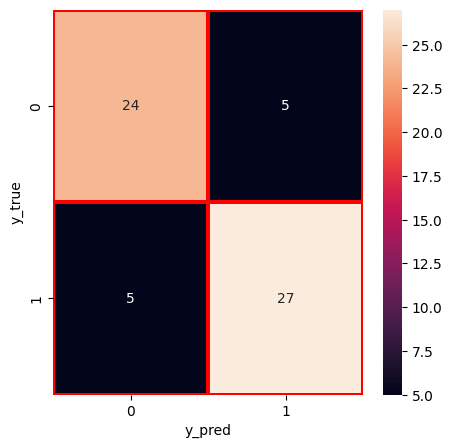


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [20]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))